In [34]:
# 导入所需的库
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [35]:
# 创建数据集
np.random.seed(0)
area = np.random.rand(1000) * 1000  # 面积
rooms = np.random.randint(1, 6, size=1000)  # 房间数量
age = np.random.randint(1, 30, size=1000)  # 楼龄

In [36]:
# 假设房价与面积、房间数量和楼龄的关系为：price = 2000 + 3*area + 5000*rooms - 200*age + random_noise
random_noise = np.random.randn(1000) * 5000
price = 2000 + 3*area + 5000*rooms - 200*age + random_noise

In [37]:
# 构造DataFrame
df = pd.DataFrame({
    'Area': area,
    'Rooms': rooms,
    'Age': age,
    'Price': price
})

# 查看前五行数据
# print(df.head())
df.head(10)

,Area,Rooms,Age,Price
0,548.813504,2,10,7834.632828
1,715.189366,5,28,16310.866425
2,602.763376,3,21,27711.159358
3,544.883183,5,28,19297.283659
4,423.654799,5,3,21169.230237
5,645.894113,5,2,24518.430319
6,437.587211,3,7,13041.286231
7,891.773001,3,15,15328.370110
8,963.662761,3,17,20617.849442
9,383.441519,4,19,17858.708711


In [38]:
# 划分数据集
X = df[['Area', 'Rooms', 'Age']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# 实例化模型并训练
model = LinearRegression()
model.fit(X_train, y_train)

# 进行预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出每个自变量的系数，保留三位小数
coefficients = ", ".join([f"{coef:.3f}" for coef in model.coef_])
print(f"Coefficients (for Area, Rooms, Age): {coefficients}")
# 输出截距（误差项），保留三位小数
print(f"Intercept: {model.intercept_:.3f}")
print(f'Mean Squared Error: {mse:.3f}')
print(f'R^2 Score: {r2:.3f}')

Coefficients (for Area, Rooms, Age): 2.453, 4789.352, -165.614
Intercept: 2161.903
Mean Squared Error: 19855450.735
R^2 Score: 0.712


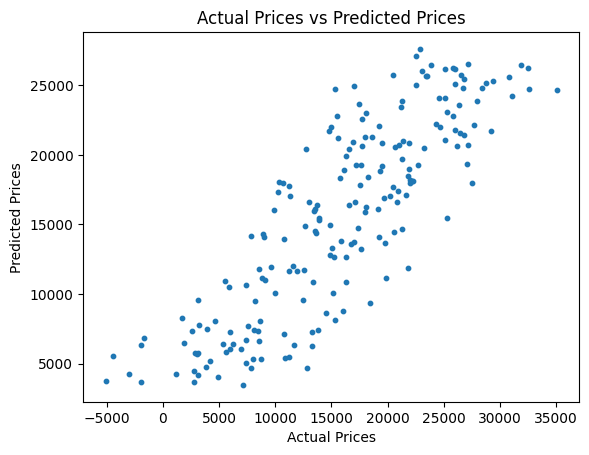

In [40]:
# 可视化实际值与预测值
plt.scatter(y_test, y_pred, s=10, label='train data')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()